# Exercise 4

Coded by:
1. Carmen Eitel - carmen.eitel@student.kit.edu

on 01.05.2019

version 1.0

## Bibliotheken und Einstellungen

In [1]:
# import libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

## Teilaufgaben

### a) Daten einlesen und erkunden
Lesen Sie den Datensatz Credit.csv ein. Erkunden Sie die Daten und konvertieren Sie gegebenenfalls kategorische Variablen in ein geeignetes Format (z.B. mit pandas.get_dummies() oder sklearn.model_selection.OneHotEncoder()). 

In [2]:
# load dataset
data_raw = pd.read_csv('./data/Credit.csv')

# first insight of data by checking the first 5 data samples
data_raw.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Es gibt 10 erkärende Variablen: Income (float), Limit (integer), Rating (integer), Cards, (integer), Age (integer), Education (integer), Gender (binary), Student (binary), Married (binary), Ethicity (categorical) und eine erklärte Variable: Balance (integer).

Die binären Variablen müssen in eine Dummy-Variable mit 1 und 0 bzw. True und False überführt werden. Die kategorische Variable muss in verschiedene Dummy-Variablen entsprechend der Anzahl ihrer Ausprägungen überführt werden (siehe Teilaufgabe c).

Im Folgenden werden die binären Variablen in eine Dummy-Variable überführt zusammen micht den integers und floats in ein Dataframe überführt.

In [31]:
pd.options.mode.chained_assignment = None

# create dummies of gender
gender_df = pd.get_dummies(data_raw["Gender"])

# select one dummy
is_male = gender_df[["Male"]]

#rename column
is_male.rename(columns = {"Male":"IsMale"}, inplace = True)

In [30]:
# create dummies for student
student = pd.get_dummies(data_raw["Student"])

# select one dummy
is_student = student[["Yes"]]

# rename column
is_student.rename(columns = {"Yes":"IsStudent"}, inplace = True)

/home/carmen/anaconda3/envs/python3_7-SmartDataAnalytics/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [5]:
# create dummies for married
married = pd.get_dummies(data_raw["Married"])

# select one dummy for married
is_married = married[["Yes"]]

# rename column
is_married.rename(columns = {"Yes":"IsMarried"}, inplace = True)

In [6]:
data_without_categorical_binary_variables = data_raw[["Balance","Income", "Limit", "Rating", "Cards", "Age", "Education"]]
data_without_categorical_variables = pd.concat([data_without_categorical_binary_variables, is_married, is_student, is_male], axis=1, join='inner')
data_without_categorical_variables.head()

,Balance,Income,Limit,Rating,Cards,Age,Education,IsMarried,IsStudent,IsMale
0,333,14.891,3606,283,2,34,11,1,0,1
1,903,106.025,6645,483,3,82,15,1,1,0
2,580,104.593,7075,514,4,71,11,0,0,1
3,964,148.924,9504,681,3,36,11,0,0,0
4,331,55.882,4897,357,2,68,16,1,0,1


Im Folgenden werden bereits die Dummies der kategorischen Variablen Ethnicty erstellt und ein geeignetes Dataframe erstellt. Damit wird der Datensplit in b) durchgeführt. Dies ist somit ein Vorzug aus der Teilaufgabe c).

In [7]:
# there are three values for ethnicities: African American, Asian, Caucasian
# convert them into three dummies

ethnicity_raw = pd.Series(data_raw["Ethnicity"], dtype="category") 
ethnicity_raw.head()

0    Caucasian
1        Asian
2        Asian
3        Asian
4    Caucasian
Name: Ethnicity, dtype: category
Categories (3, object): [African American, Asian, Caucasian]

In [8]:
# create dummies
african_american = pd.get_dummies(ethnicity_raw == "African American")
asian = pd.get_dummies(ethnicity_raw == "Asian")
caucasian = pd.get_dummies(ethnicity_raw == "Caucasian")

# select one dummy for african_american
is_african_american = african_american[[1]]

# rename column of is_african_american
is_african_american.rename(columns = {True : "IsAfricanAmerican"}, inplace = True)

# select one dummy for asian and caucasian
is_asian = asian[[1]]
is_caucasian = caucasian[[1]]

# rename columns
is_asian.rename(columns = {True : "IsAsian"}, inplace = True)
is_caucasian.rename(columns = {True : "IsCaucasian"}, inplace = True)

In [9]:
# create dataframe with all variables
data = pd.concat([data_without_categorical_variables, is_asian, is_caucasian, is_african_american], axis = 1, join = 'inner')
data.head()

,Balance,Income,Limit,Rating,Cards,Age,Education,IsMarried,IsStudent,IsMale,IsAsian,IsCaucasian,IsAfricanAmerican
0,333,14.891,3606,283,2,34,11,1,0,1,0,1,0
1,903,106.025,6645,483,3,82,15,1,1,0,1,0,0
2,580,104.593,7075,514,4,71,11,0,0,1,1,0,0
3,964,148.924,9504,681,3,36,11,0,0,0,1,0,0
4,331,55.882,4897,357,2,68,16,1,0,1,0,1,0


#### Vertraut werden mit Daten

In [10]:
data.shape

(400, 13)

In [11]:
data.describe()

,Balance,Income,Limit,Rating,Cards,Age,Education,IsMarried,IsStudent,IsMale,IsAsian,IsCaucasian,IsAfricanAmerican
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.0000
mean,520.015000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.61250,0.100000,0.482500,0.255000,0.49750,0.2475
std,459.758877,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.48779,0.300376,0.500319,0.436407,0.50062,0.4321
min,0.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0000
25%,68.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.0000
50%,459.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.0000
75%,863.000000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.00000,0.000000,1.000000,1.000000,1.00000,0.0000
max,1999.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.0000


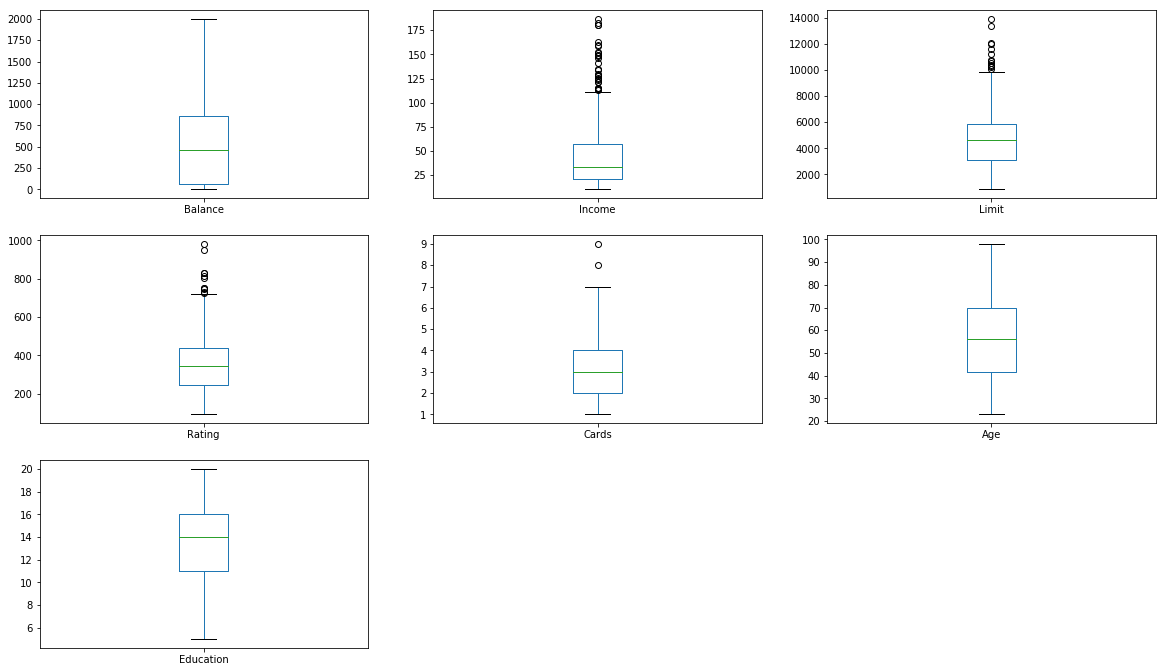

In [12]:
data.iloc[:, : 7].plot(figsize = (20, 20), kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False);  # show boxplots

In [13]:
binary_data = data.iloc[:, 7:]

for col in binary_data.columns:
    print(str(binary_data[col].value_counts()))

1    245
0    155
Name: IsMarried, dtype: int64
0    360
1     40
Name: IsStudent, dtype: int64
0    207
1    193
Name: IsMale, dtype: int64
0    298
1    102
Name: IsAsian, dtype: int64
0    201
1    199
Name: IsCaucasian, dtype: int64
0    301
1     99
Name: IsAfricanAmerican, dtype: int64


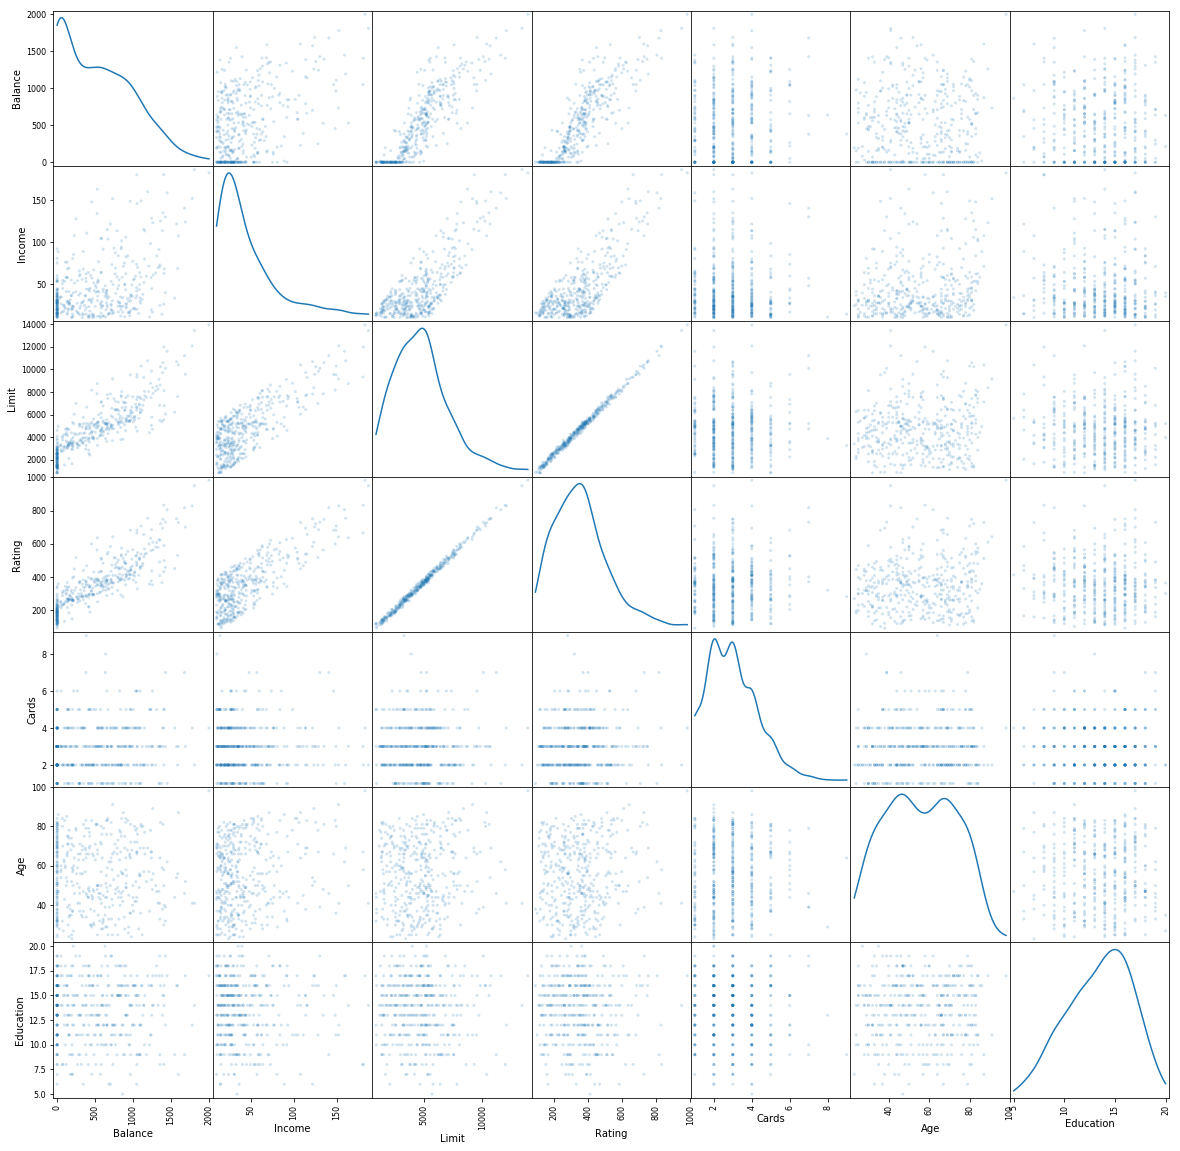

In [14]:
pd.plotting.scatter_matrix(data.iloc[:,:7], alpha=0.2, figsize=(20, 20), diagonal='kde');

# TODO: beschreiben

### b) Datensatz teilen
Separieren Sie den Datensatz in 80%-20% für Training und Testdatensatz. Was müssen Sie hier beachten?

In [15]:
# split into dependent y and independent X variables
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [16]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Es muss beachtet werden, dass die Daten geshuffelt und dann separiert werden, sodass die Daten iid sind und beispielsweiße keine unterschiedliche Varianz oä in den zwei Splits vorhanden ist. 

### c) OLS mit allen Variablen und ohne Limit
Erstellen Sie aus der Variable Ethnicity drei binäre Variablen Ethnicity_Caucasian, Ethnicity_Asian und Ethnicity_African. Führen Sie eine lineare Regression mit OLS als Schätzer mit diesen Variablen und allen anderen Variablen (außer Limit) durch. Berechnen Sie Root Mean Square Error (RMSE) zwischen der Vorhersage und den wahren Werten im Test-Datensatz. Beschreiben Sie Ihre Ergebnisse.

# TODO mse to rmse

Binäre Variablen wurde bereits in Teilaufgabe a) erstellt.

In [17]:
def ols(X_train, y_train, X_test, y_test):
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    coef = regr.coef_
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return coef, rmse, r2

#### OLS mit allen Variablen

In [18]:
# ols
coef_allVars, mse_allVars, r2_allVars = ols(X_train, y_train, X_test, y_test)

# The coefficients
print('Coefficients: \n', coef_allVars)
# The mean squared error
print("Mean squared error: %.2f"
      % mse_allVars)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_allVars)

Coefficients: 
 [-7.55405882e+00  1.98058079e-01  9.71292280e-01  1.91238262e+01
 -6.03694957e-01 -1.07867443e+00 -6.15036452e+00  4.18435398e+02
  1.24937247e+01  5.02464790e+00  3.24625244e+00 -8.27090034e+00]
Mean squared error: 89.30
Variance score: 0.95


#### OLS ohne Limit

In [19]:
# drop column "Limit"
X_train_withoutLimit = X_train.drop(columns="Limit")
X_test_withoutLimit = X_test.drop(columns="Limit")

# ols
coef_withoutLimit, mse_withoutLimit, r2_withoutLimit = ols(X_train_withoutLimit, y_train, X_test_withoutLimit, y_test)

# The coefficients
print('Coefficients: \n', coef_withoutLimit)
# The mean squared error
print("Mean squared error: %.2f"
      % mse_withoutLimit)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_withoutLimit)

Coefficients: 
 [-7.57393107e+00  3.93109311e+00  4.18130616e+00 -5.87846407e-01
 -3.46832562e-01 -1.21238103e+01  4.12661119e+02  1.28426029e+01
  8.82338701e+00  2.78668389e+00 -1.16100709e+01]
Mean squared error: 91.43
Variance score: 0.95


# TODO explain: perfect regression????

### d) OLS ohne Variable Ethnicity_Caucasian
Führen Sie die Analyse in 4c) erneut durch, ohne die Variable Ethnicity_Caucasian. Vergleichen Sie diese Ergebnisse mit denen aus 4c).

In [20]:
# drop column "IsCaucasian"
X_train_withoutIsCaucasian = X_train.drop(columns="IsCaucasian")
X_test_withoutIsCaucasian = X_test.drop(columns="IsCaucasian")

# ols
coef_withoutIsCaucasian, mse_withoutIsCaucasian, r2_withoutIsCaucasian = ols(X_train_withoutIsCaucasian, y_train, X_test_withoutIsCaucasian, y_test)

# The coefficients
print('Coefficients: \n', coef_withoutIsCaucasian)
# The mean squared error
print("Mean squared error: %.2f"
      % mse_withoutIsCaucasian)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_withoutIsCaucasian)

Coefficients: 
 [-7.55405882e+00  1.98058079e-01  9.71292280e-01  1.91238262e+01
 -6.03694957e-01 -1.07867443e+00 -6.15036452e+00  4.18435398e+02
  1.24937247e+01  1.77839546e+00 -1.15171528e+01]
Mean squared error: 89.30
Variance score: 0.95


# TODO: beschreiben und mit 4c vergleichen

### e) OLS mit unterschiedlichen Variablen
Führen Sie eine lineare Regression (OLS) mit folgenden Variablendurch: 
1. Income, Limit, Age
2. Income, Rating, Age
3. Income, Limit, Rating, Age 

Beschreiben Sie die Koeffizienten, Konfidenzintervalle und Signifikanzniveau. Vergleichen Sie die Ergebnisse.

#### 1. OLS mit Income, Limit, Age

In [21]:
# select features
cols_4e_1 = ["Income", "Limit", "Age"]
X_train_4e_1 = X_train[cols_4e_1]
X_test_4e_1 = X_test[cols_4e_1]

# ols
coef_4e_1, mse_4e_1, r2_4e_1 = ols(X_train_4e_1, y_train, X_test_4e_1, y_test)

# The coefficients
print('Coefficients: \n', coef_4e_1)
# The mean squared error
print("Mean squared error: %.2f"
      % mse_4e_1)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_4e_1)

Coefficients: 
 [-7.32962971  0.26035741 -0.82051759]
Mean squared error: 176.08
Variance score: 0.81


#### 2. OLS mit Income, Rating, Age

In [22]:
# select features
cols_4e_2 = ["Income", "Rating", "Age"]
X_train_4e_2 = X_train[cols_4e_2]
X_test_4e_2 = X_test[cols_4e_2]

# ols
coef_4e_2, mse_4e_2, r2_4e_2 = ols(X_train_4e_2, y_train, X_test_4e_2, y_test)

# The coefficients
print('Coefficients: \n', coef_4e_2)
# The mean squared error
print("Mean squared error: %.2f"
      % mse_4e_2)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_4e_2)

Coefficients: 
 [-7.33093763  3.88938641 -0.8816772 ]
Mean squared error: 169.23
Variance score: 0.83


#### 3. OLS mit Income, Limit, Rating, Age

In [23]:
# select features
cols_4e_3 = ["Income", "Limit", "Rating", "Age"]
X_train_4e_3 = X_train[cols_4e_3]
X_test_4e_3 = X_test[cols_4e_3]

# ols
coef_4e_3, mse_4e_3, r2_4e_3 = ols(X_train_4e_3, y_train, X_test_4e_3, y_test)

# The coefficients
print('Coefficients: \n', coef_4e_3)
# The mean squared error
print("Mean squared error: %.2f"
      % mse_4e_3)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_4e_3)

Coefficients: 
 [-7.38902371  0.10198795  2.3817625  -0.85433469]
Mean squared error: 170.44
Variance score: 0.83


# TODO: beschreiben, vergleichen, Signifikanz und Konfidenzintervall

### f) Korrelation
Was ist Korrelation? Wann benutzt man Pearson Korrelation, Spearman Korrelation und Kendalls Tau? Berechnen Sie Korrelationen zwischen allen Variablen im Trainings-Datensatz. Welche Schlussfolgerung können Sie daraus ziehen?

Anmerkung: $*$: Multiplikationszeichen
Auszüge aus Ausschitte aus dem Skript zur Vorlesung Statistik für Fortgeschrittene WS 2018/2019 Lehrstuhl für Analytics and Statistics (Prof. Grothe KIT), S. 58-61)
#### Was ist Korrelation?
Korrelation misst die Stärke und Richtung des Zusammenhangs bzw. der Abhängigkeit zwischen zwei Zufallsvariablen. 
Die Korrelation ist nicht mit Kausalität gleichzusetzen, da zwar ein Zusammenhang zwischen zwei Zufallsvariablen möglich ist, ohne dass diese sich direkt beeinflussen.

#### Pearson Korrelation
Das bekannteste skalare Zusammenhangsmaß zweier Zufallsvariablen X und Y ist der Korrelationskoeffizient
nach Bravais-Pearson:

$$Corr(X,Y) = \rho_{BP} = \dfrac{Cov(X,Y)}{\sqrt{X}*\sqrt{Y}}$$

Er misst die Stärke des linearen Zusammenhangs von X und Y und hängt von den
Randverteilungen von X und Y ab. 
Sein Wertebereich ist $[-1,1]$.

#### Spearman Korrelation
Das Korrelationsmaß Spearmans $\rho_S$ ist unabhängig von der Randverteilung und somit ein Rangkorrelationskoeffizient.
$$\rho_S = \dfrac{Cov(F_X(X), F_Y(Y))}{\sqrt{Var(F_X(X))}*\sqrt{F_Y(Y)}} = \dfrac{Cov(U, V)}{\sqrt{Var(U)}*\sqrt{Var(V)}}$$

$F_Z(Z)$ ist die Verteilungsfunktion der Zufallsvariable $Z$

Als Rangkorrelationskoeffizient ist Spearmans's $\rho_S$ invariant gegenüber streng monoton wachsende Transformationen $\alpha(.)$ und $\beta(.)$ der Ränder: 

$$ \rho_{S,X,Y} = \rho_{S,\alpha(x), \beta(Y)} $$

Auch hier ist der Wertebereich $[-1,1]$, jedoch wird nicht die Stärke des linearen Zusammenhangs zwischen den Zufallsvariablen X und Y, sondern zwischen U und V und somit den monotonen Zusammenhangs zwischen X und Y.


##### Kendalls $\tau$
Seien X, Y Zufallsvariablen mit gemeinsamer Verteilungsfunktion F X,Y und Copula C.
Mit $(X^∗ , Y^∗ )$ bezeichnen wir eine ”unabhängige Kopie” von $(X,Y)$.
Kendalls $\tau$ ist dann definiert durch:

$$\tau = P((X-X^*)((Y-Y^*))>0)-P((X-X^*)((Y-Y^*))<0)$$

Die erste Wahrscheinlichkeit heißt Konkordanz- die zweite Wahrscheinlichkeit Diskordanzwahrscheinlichkeit. Man kann zeigen, dass

$$ \tau = \dfrac{Cov(sign(X-X^*), sign(Y-Y^*))}{\sqrt{Var(sign(X-X^*))}\sqrt{Var(sign(Y-Y^*))}}$$

mit $$sign(z)= \left\{ \begin{array}{c} 1\quad z>0\\0 \quad   z=0\\-1 \quad   z<0 \end{array} \right.$$

Auch Kendalls $\tau$ ist ein Rangkorrelationskoeffizient.

#### Wann verwendet man was
Rangkorrelationsmaße können auch für ordinalskalierte Daten verwendet werden.
Ein linearer Zusammenhang impliziert einen monotonen Zusammenhang. Umgekehrt gilt dies nicht.
Ein Rangkorrelationsmaß ist zudem robuster gegenüber Ausreißer.

#### Berechnungen und Schlussfolgerung

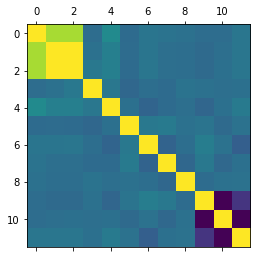

In [24]:
# Pearson Correlation
corr_pearson = X.corr('pearson')
plt.matshow(corr_pearson)
plt.show()

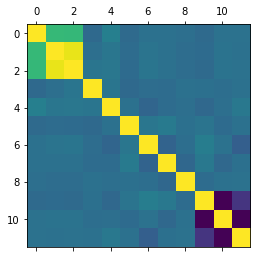

In [25]:
# Kendalls Correlation
corr_kendall = X.corr('kendall')
plt.matshow(corr_kendall)
plt.show()

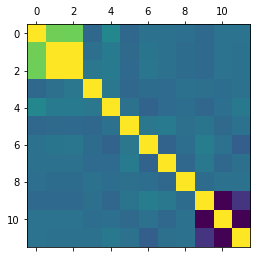

In [26]:
# Spearman Correlation
corr_spearman = X.corr('spearman')
plt.matshow(corr_spearman)
plt.show()

# TODO: Interpretation rating+limit, 

### g) Random Forest
Führen Sie die Analyse in 4e) mit Random Forest anstatt der linearen Regression durch. Variieren Sie dabei den Parameter random_state mit den Werten {1, 33, 135, 123, 99, 22} und einigen selbst gewählten Werten. Berechnen Sie MSE des Test-Datensatzes. Vergleichen Sie Feature Importance. Welche Schlussfolgerung können Sie daraus ziehen?

In [27]:
def featureImportance(rf):
    # Get numerical feature importances
    importances = list(rf.feature_importances_)

    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

    return feature_importances

def randomForest(n_estimators, random_state, X_train, y_train, X_test, y_test):

    # Instantiate model 
    rf = RandomForestRegressor(n_estimators, random_state)

    # Train the model on training data
    rf.fit(X_train, y_train)
   
    # Use the forest's predict method on the test data
    y_pred = rf.predict(X_test)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    feature_importances = featureImportance(rf)

    return mse, feature_importances

In [28]:
mse_4g_1, feature_importances_4g_1 = randomForest(1000, 1, X_train_4e_1, y_train, X_test_4e_1, y_test)
print("mse:" + str(mse_4g_1) + " \n feature_importance:" + str(feature_importances_4g_1))


KeyError: 1

# Todo: calculate and conclude

### h) Multikollinearität
Was ist Multikollinearität? Was sind ihre möglichen Ursachen und Auswirkungen? Wie kann man sie erkennen? Welche Maßnahmen gibt es, wenn Variablen in den Daten kollinear sind?

Multikollinearität liegt vor, wenn zwei oder mehr erklärende Variablen hoch untereinander korreliert sind. Mit zunehmender Multikollinearität wird das Verfahren um die Regressionsparameter zu schätzen instabil und die Interpretation des Modells uneindeutig. Zwar ist der Schätzer im Falle hoher Multikollinearität immer noch BLU (best linear unbiased), jedoch sind die Koeffizienten sehr ungenau geschätzt und das Konfindeninterval zwar gültig, jedoch sehr breit. Dies ist darauf zurückzuführen, dass der Einfluss der einzelnen Variablen schlecht isoliert werden kann.

Perfekte Mulikollinearität (exakte lineare Beziehung zwischen Regressoren) führt dazu, dass die Durchführung der linearen Regressionsalanyse unmöglich wird.
Erkennbar wird Multikollinearität durch ein hohes Bestimmtheitsmaß (z.B. $R²$) zusammen mit niedrigen t-Werten (wenig Signifikanz) für die Regressionsparameter. Zudem kann man direkt an der paarweise Korrelation zwischen den Regressoren (größer 0,7 oder 0,8) Multikollinearität erkennen. Eine weitere Möglichkeit sind Hilfsregressionen, bei denen die erklärenden Variablen aufeinander regressiert werden. Je höher das $R²$ dieser Hilsregression, desto größer das Multikollinearitätsproblem.

Ursache perfekter Multikollinearität sind beispielsweise falsch verwendete Dummyvariablen, also z.B. eine Variable isStudent und eine isNotStudent. Ursachen für beinahe Mutlikollinearität sind gemeinsame Trends oder zu viele erklärende Variablen, die fast dasselbe messen.

Maßnahmen: Für Prognosen stellt Multikollinearität kein Problem dar. Soll jedoch der Einfluss einer erklärenden Variable auf die abhängige Variable geschätzt werden, liegt ein Problem vor. Möglichkeiten: 
- Zusätzliche externe Informationen: beispielsweise Zeitreihen- und Querschnittsdaten kombinieren
- Transformation der Variablen: beispielsweise Bildung erster Differenzen bei trendbehafteten Zeitreihen
- Variable weglassen (kann gefährlich werden: wenn beispielsweise Raucher ihr Handy in der Hosentasche aufbewahren, da eine andere Taschen der Kleidung mit der Zigarrettenschachtel belegt ist. Würde man nun die Variable istRaucher weglassen und bestimmen, ob und welchen Zusammenhang das Handy in der Hosentasche auf das Krebsrisiko hat, könnten schnell falsche Schlüsse gezogen werden)


(https://www.uibk.ac.at/econometrics/einf/kap08la.pdf)
